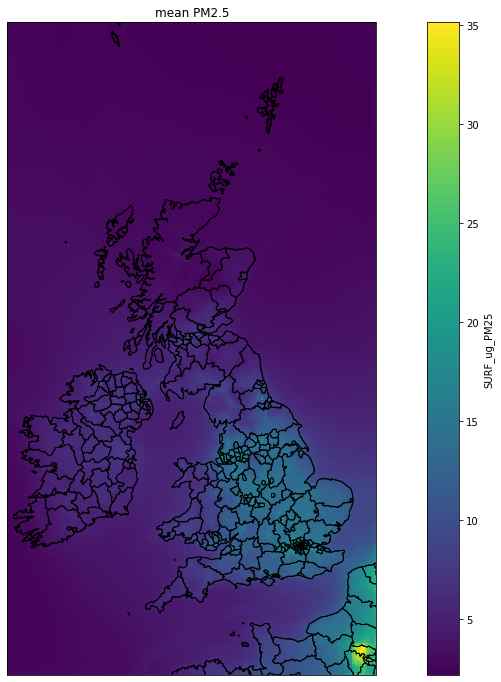

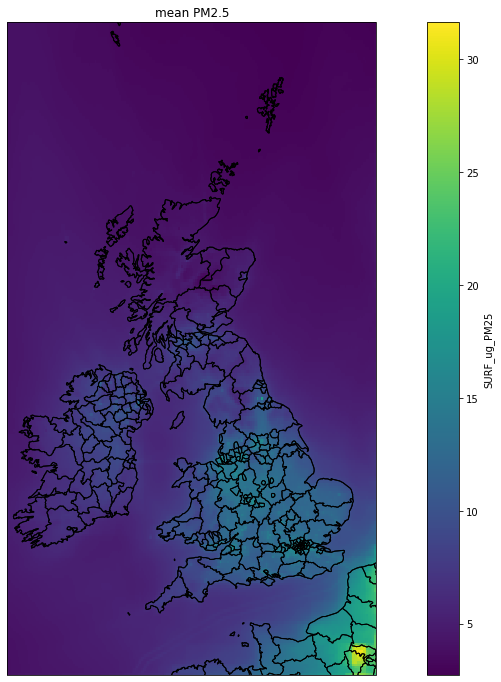

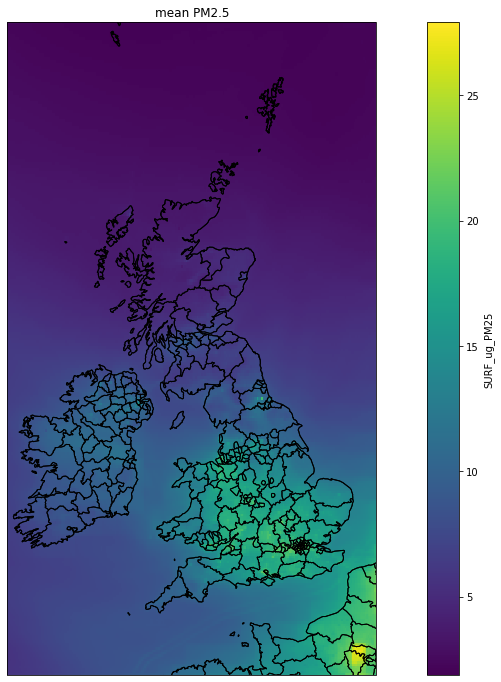

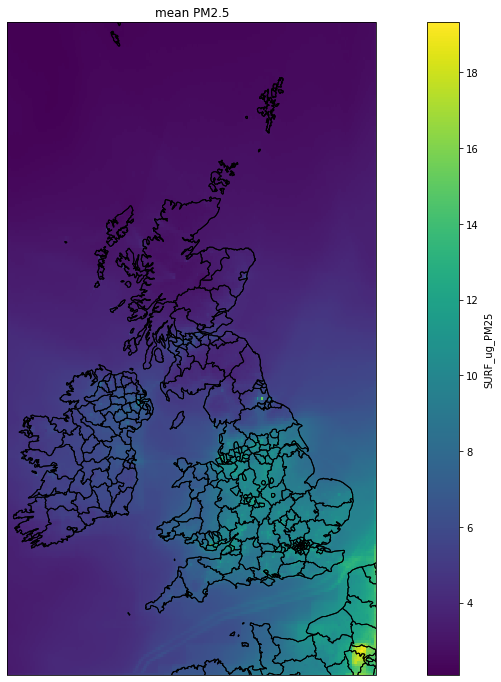

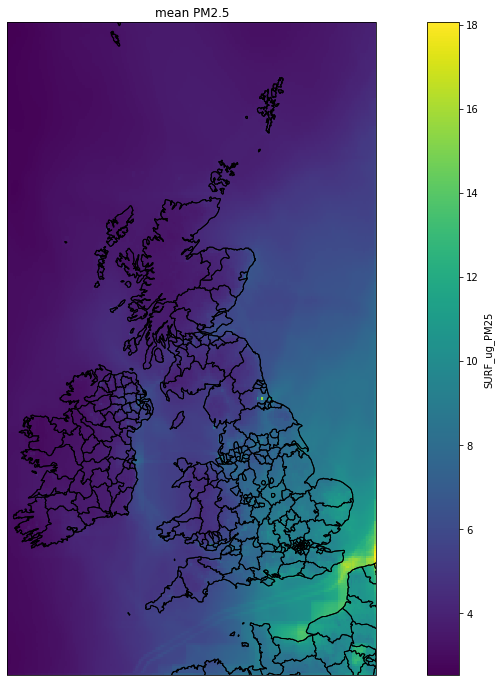

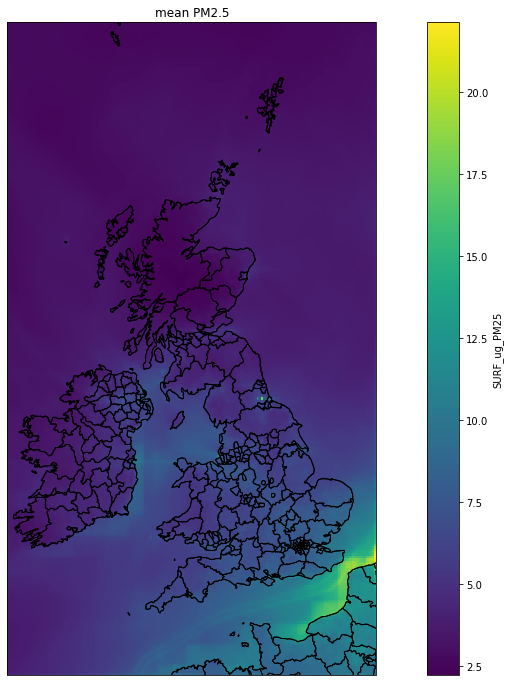

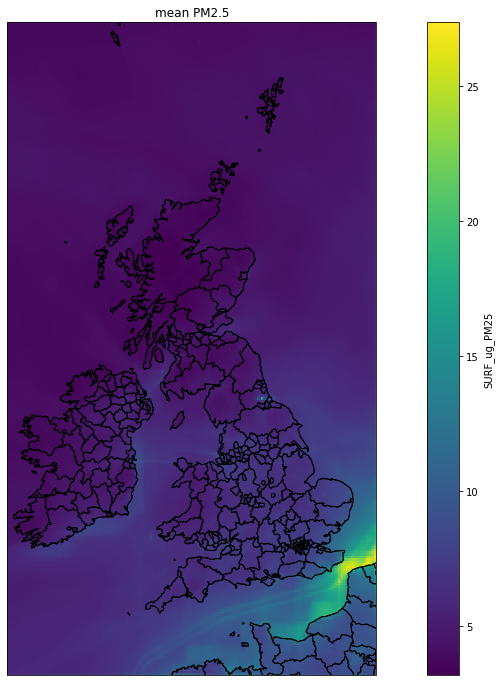

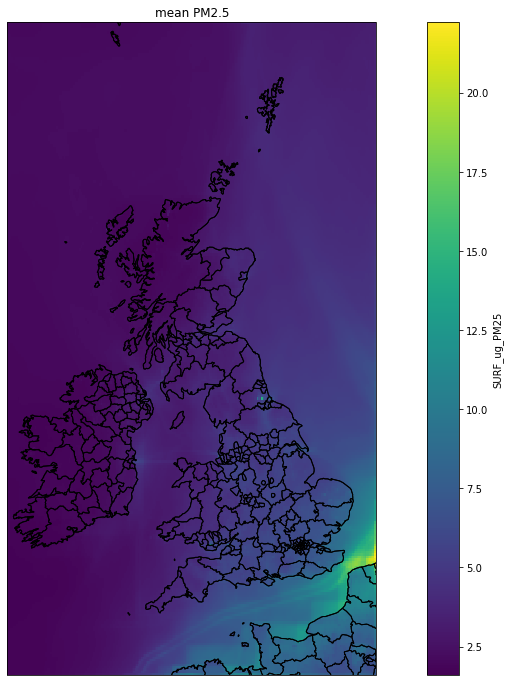

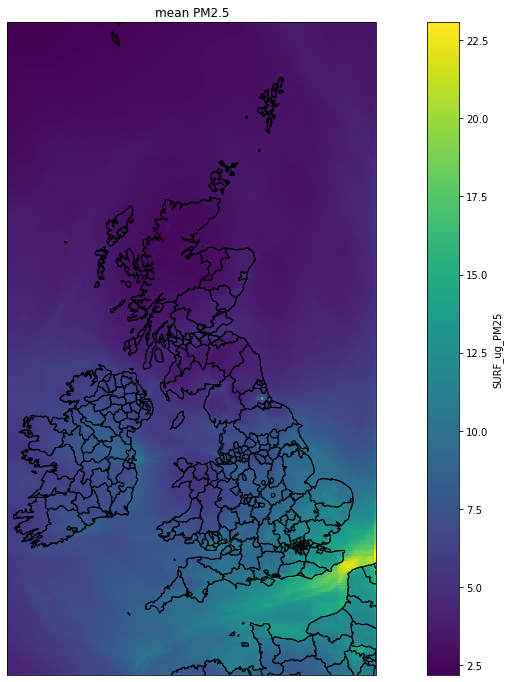

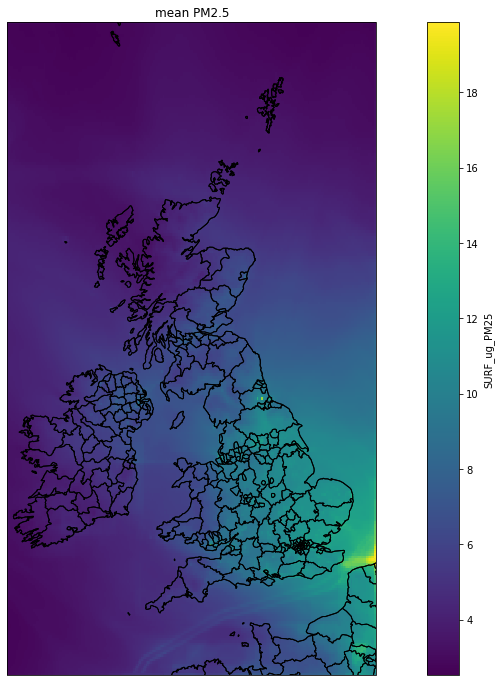

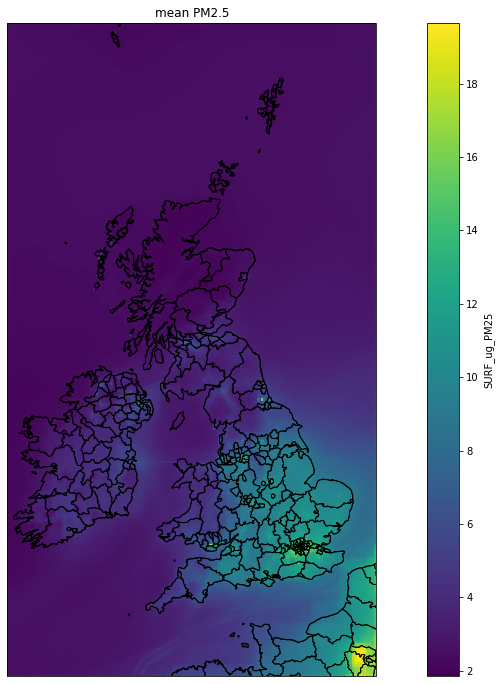

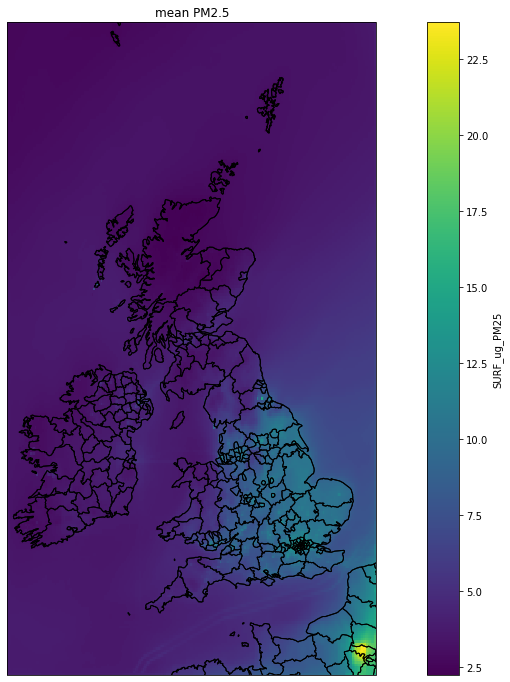

In [46]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from ipywidgets import interactive
import matplotlib as mpl
from matplotlib.cm import get_cmap
from matplotlib.colors import from_levels_and_colors
import matplotlib.collections as col
from matplotlib.colors import Normalize
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature
import cartopy.io.shapereader as shpreader
from cartopy.io.shapereader import Reader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import (OCEAN, LAKES, BORDERS, COASTLINE, RIVERS, COLORS,
                             LAND)
from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)
from wrf import (getvar, to_np, vertcross, smooth2d, CoordPair, GeoBounds,
                 get_cartopy, latlon_coords, cartopy_xlim, cartopy_ylim)
from wrf import getvar, interplevel, to_np, get_basemap, latlon_coords
import os
import pandas as pd
import glob
from netCDF4 import Dataset, num2date

directory = r'C:\Users\conno\OneDrive\Documents\pythonstuff\EMEP'

statesetc = shpreader.natural_earth(resolution='10m',# downloads states & provinces from Natural Earth
                                      category='cultural',
                                      name='admin_1_states_provinces') #unfortunately only higher tier LAs. May need to upload own shapefile instead
shape_feature_another = ShapelyFeature(Reader(statesetc).geometries(),
                                ccrs.PlateCarree(), edgecolor='black', facecolor = 'none') #setting the facecolor as none is important, otherwise you can't see what is being plotted 

files = os.listdir(directory) # need to make sure python file is saved in the same directory
filelist = []
for f in files:
    if f.endswith(".nc"):
        filelist.append(f) # turns the files into a list which can be iterated over
        


PM2010 = filelist[0]
PM2011 = filelist[1]
PM2012 = filelist[2]
PM2013 = filelist[3]
PM2014 = filelist[4]
PM2015 = filelist[5]
PM2016 = filelist[6]

data = xr.open_dataset (PM2013) #change this to view months of different years
pmdata = data['SURF_ug_PM25']
pmdata['month'] = pmdata['time'].dt.month #this creates an extra column called month based on the month in the datetime column. I can then use .loc to group them by month
Jan = pmdata.loc[pmdata['month']== 1]
Feb = pmdata.loc[pmdata['month']== 2]
Mar = pmdata.loc[pmdata['month']== 3]
Apr = pmdata.loc[pmdata['month']== 4]
May = pmdata.loc[pmdata['month']== 5]
Jun = pmdata.loc[pmdata['month']== 6]
Jul = pmdata.loc[pmdata['month']== 7]
Aug = pmdata.loc[pmdata['month']== 8]
Sep = pmdata.loc[pmdata['month']== 9]
Oct = pmdata.loc[pmdata['month']== 10]
Nov = pmdata.loc[pmdata['month']== 11]
Dec = pmdata.loc[pmdata['month']== 12]

PM_Month = [Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec] #can be iterated over

for_plot = To_analyse.mean (dim = 'time')


for m in PM_Month:
    for_plot = m.mean (dim = 'time') #averages all the readings for each month
    fig = plt.figure (figsize = (18, 12))
    ax =plt.axes(projection = ccrs.Mercator(central_longitude = 1.96)) 
    ax.coastlines()
    ax.set_extent([-10.7,2.6,48.5,61.8])
    ax.add_feature(shape_feature_another) #adds the natural earth boundaries
    for_plot.plot(transform=ccrs.PlateCarree())

    plt.title ('mean PM2.5')
    plt.show

